In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

In [46]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [47]:
import warnings
# Ignoramos algunos warnings que se producen por invocar el modelo sin el nombre de las características
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')

In [48]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [49]:
df = pd.read_csv("iris.csv", sep=';')

In [50]:
df.head()

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
df.isna().sum()

s.largo    0
s.ancho    0
p.largo    0
p.ancho    0
tipo       0
dtype: int64

In [52]:
df.describe()

,s.largo,s.ancho,p.largo,p.ancho
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
train_set, val_set, test_set = train_val_test_split(df)


In [54]:
X_train, y_train = remove_labels(train_set, 'tipo')
X_val, y_val = remove_labels(val_set, 'tipo')
X_test, y_test = remove_labels(test_set, 'tipo')

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.9666666666666667


In [58]:
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 1.0


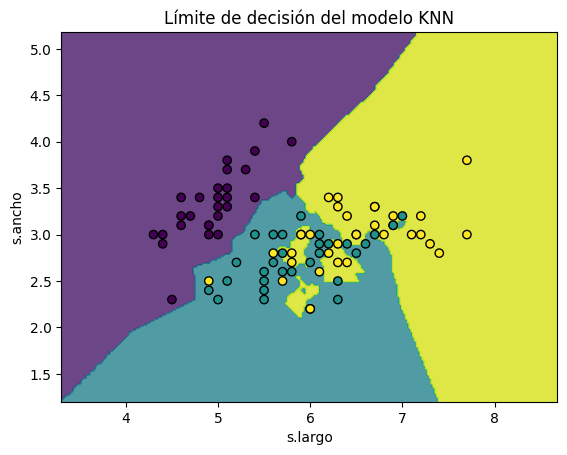

In [59]:
def plot_decision_boundary(model, X, y):
    # Definir los límites del gráfico
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.02  # Paso en la malla

    # Crear una malla de puntos para graficar
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar el límite de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('Límite de decisión del modelo KNN')
    plt.show()

from sklearn.preprocessing import LabelEncoder

# Seleccionar solo dos características para graficar
X_train_2d = X_train[['s.largo', 's.ancho']].apply(pd.to_numeric)

# Convertir las etiquetas de clase a valores numéricos
label_encoder = LabelEncoder()
y_train_2d = label_encoder.fit_transform(y_train)

# Ajustar el modelo con las dos características seleccionadas
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train_2d)

# Graficar el límite de decisión
plot_decision_boundary(knn_2d, X_train_2d, y_train_2d)

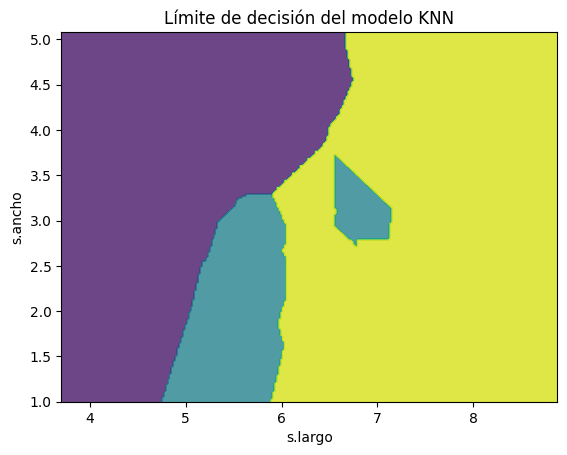

In [60]:
def plot_decision_boundary(model, X, y):
    # Definir los límites del gráfico
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.02  # Paso en la malla

    # Crear una malla de puntos para graficar
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar el límite de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('Límite de decisión del modelo KNN')
    plt.show()

from sklearn.preprocessing import LabelEncoder

# Seleccionar solo dos características para graficar
X_val_2d = X_val[['s.largo', 's.ancho']].apply(pd.to_numeric)

# Convertir las etiquetas de clase a valores numéricos
label_encoder = LabelEncoder()
y_val_2d = label_encoder.fit_transform(y_val)

# Ajustar el modelo con las dos características seleccionadas
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_val_2d, y_val_2d)

# Graficar el límite de decisión
plot_decision_boundary(knn_2d, X_val_2d, y_val_2d)


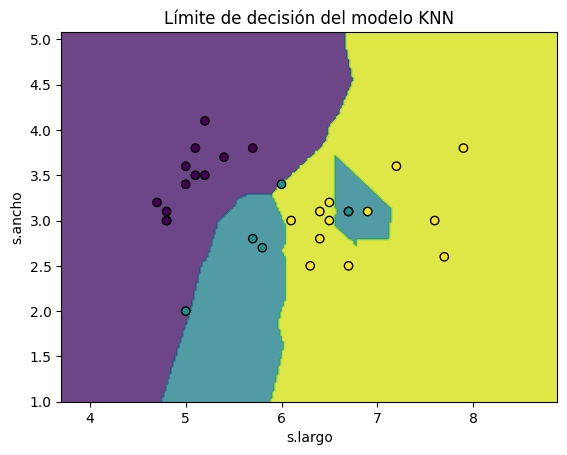

In [61]:
def plot_decision_boundary(model, X, y):
    # Definir los límites del gráfico
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.02  # Paso en la malla

    # Crear una malla de puntos para graficar
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar el límite de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('Límite de decisión del modelo KNN')
    plt.show()

from sklearn.preprocessing import LabelEncoder

# Seleccionar solo dos características para graficar
X_val_2d = X_val[['s.largo', 's.ancho']].apply(pd.to_numeric)

# Convertir las etiquetas de clase a valores numéricos
label_encoder = LabelEncoder()
y_val_2d = label_encoder.fit_transform(y_val)

# Ajustar el modelo con las dos características seleccionadas
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_val_2d, y_val_2d)

# Graficar el límite de decisión
plot_decision_boundary(knn_2d, X_val_2d, y_val_2d)

In [64]:
from sklearn.model_selection import cross_val_score

# Supongamos que ya tienes definido tu modelo y tus datos
# knn = KNeighborsClassifier(n_neighbors=3)
# X, y = ...

scores = cross_val_score(knn, X_val, y_val, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.83333333]
Mean accuracy: 0.9666666666666666
